<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_4_Fastai_From_local_files_SOLUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast AI from local files 

Nous avons appris dans les cours précédent à utiliser la librairies FastAI sur des datasets pré-enregistrés. Voyons comment nous pouvons importer nos propre données 

1. Importez le module ```fastai.vision```

In [0]:
from fastai.vision import *

2. Nous allons faire une classification d'objets. Allez sur le net et créez deux fichiers csv qui comporte des liens urls vers les deux objets que vous souhaitez détecter. 

Un moyen simple de faire ceci est d'aller sur Google Images, de faire votre recherche, de scroller jusqu'à ce que vous voyez un nombre d'images suffisant puis ouvrez une console via ```cmd+opt+j``` pour Mac ou ```F12``` puis onglet console pour Windows et exécutez le code suivant : 

```
document.body.innerHTML = `<a href="data:text/csv;charset=utf-8,${escape(Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou).join('\n'))}" download="urls_${document.getElementsByName("q")[0].value.split(" ").join("_")}.csv">download urls</a>`;
```



from google.colab import files

uploaded = files.upload()

In [0]:
from google.colab import files

uploaded = files.upload()

Saving femme.csv to femme.csv
Saving homme.csv to homme.csv


3. Via pathlib, créez un chemin qu'on appellera ```data/gender```

In [0]:
path = Path("data/gender")

4. A l'intérieur de ce dossier ```gender```, créez un nouveau dossier ```hommes```. Vous pouvez le faire via la commande ```.mkdir()```

In [0]:
homme = "hommes"
dest_h = path/homme
dest_h.mkdir(parents=True, exist_ok=True)

5. Faites de même mais cette fois pour le dossier ```femmes```

In [0]:
femme = "femmes"
dest_f = path/femme
dest_f.mkdir(parents=True, exist_ok=True)

6. Regardez maintenant tout de ce que contient votre dossier ```gender```

In [0]:
path.ls()

[PosixPath('data/gender/hommes'), PosixPath('data/gender/femmes')]

7. Ce que contient nos fichiers ne sont que des URLs. Nous avons besoin de télécharger ces images. Pour cela vous pouvez vous aider de la méthode [download_images()](https://docs.fast.ai/vision.data.html#download_images)

In [0]:
download_images("homme.csv", dest_h)

In [0]:
download_images("femme.csv", dest_f)

8. Regardez à nouveau ce que vous avez à l'intérieur de votre dossier ```gender```

In [0]:
list(path.glob("*/*"))[:10]

[PosixPath('data/gender/hommes/00000254.jpg'),
 PosixPath('data/gender/hommes/00000033.jpg'),
 PosixPath('data/gender/hommes/00000054.jpg'),
 PosixPath('data/gender/hommes/00000013.jpg'),
 PosixPath('data/gender/hommes/00000282.jpg'),
 PosixPath('data/gender/hommes/00000001.jpg'),
 PosixPath('data/gender/hommes/00000264.jpg'),
 PosixPath('data/gender/hommes/00000229.jpg'),
 PosixPath('data/gender/hommes/00000157.jpg'),
 PosixPath('data/gender/hommes/00000243.jpg')]

9. Puisque nous sortons ces images directement de Google, il est possible que certaines ne soient pas parfaites. Nous avons une méthode utile avec FastAI qui nous permet de vérifier chacune des images.

[Verify_images](https://docs.fast.ai/vision.data.html#verify_images)

Tentez d'utiliser cette méthode pour chacun de vos dossiers

In [0]:
verify_images(path/"hommes", delete=True)

In [0]:
verify_images(path/"femmes", delete=True)

10. Maintenant, nous sommes prêts à créer un ```ImageDataBunch```. Faites attention cependant, nous n'avons pas de dossier ```train``` et de dossier ```test```, nous devrons donc faire en sorte de séparer notre dossier ```gender```. Pour cela, vous pouvez utiliser l'argument ```valid_pct=float```

In [0]:
data = ImageDataBunch.from_folder(
    path, 
    train=".", 
    valid_pct=0.2,
    ds_tfms=get_transforms(), 
    size=224, 
    num_workers=4
).normalize(imagenet_stats)

11. Regardez les différentes classes que vous avez dans votre ```ImageDataBunch```

In [0]:
data.classes

['femmes', 'hommes']

12. Regardez un premier batch

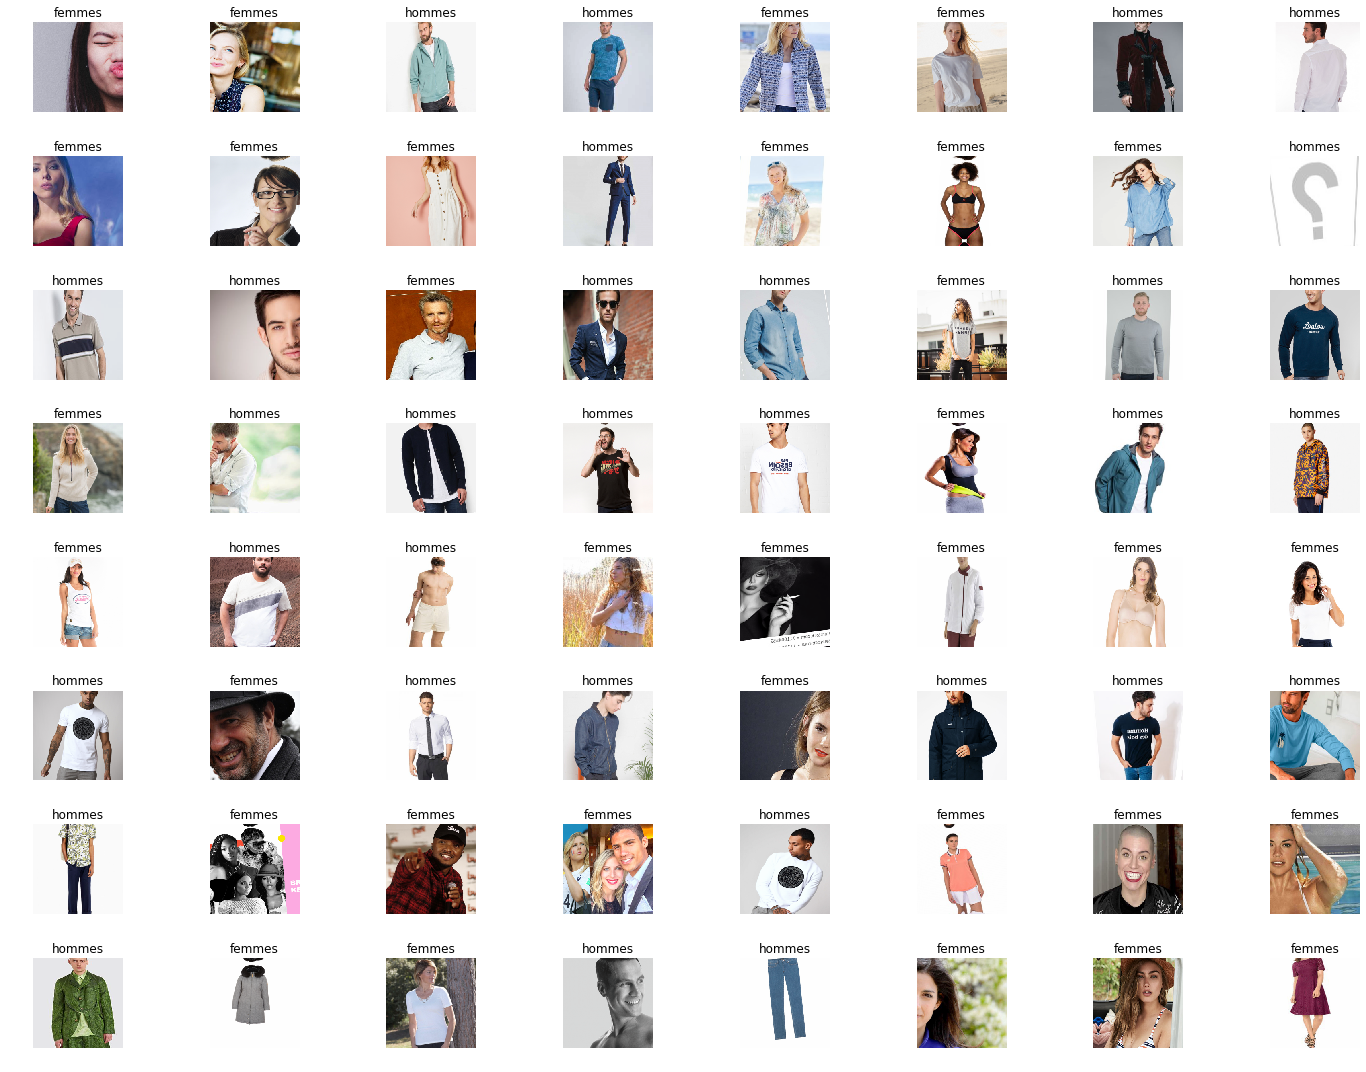

In [0]:
data.show_batch(rows=10, figsize=(20,15))

13. Regardez la taille de votre train set et la taille de votre test set 

In [0]:
print("Nous avons {} classes,\nle train set fait {} lignes et le test set fait {} lignes".format(data.classes, 
                                                                                                len(data.train_ds), 
                                                                                                len(data.valid_ds)))

Nous avons ['femmes', 'hommes'] classes,
le train set fait 528 lignes et le test set fait 132 lignes


14. Créez un modèle resnet34 avec la metric ```accuracy``` pour voir ce que donne votre modèle 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 109MB/s]


15. Entrainez le sur 4 epochs

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.950930,0.632791,0.818182,00:22
1,0.730842,0.528839,0.863636,00:21
2,0.611460,0.521409,0.840909,00:21
3,0.507656,0.504159,0.840909,00:21


16. Pour éviter de perdre votre modèle pré-entrainé, vous pouvez le sauvegarder va la méthode [.save()](https://docs.fast.ai/basic_train.html#Saving-and-loading-models)

In [0]:
learn.save('stage-1')

17. Trouvez votre learning rate optimal 

In [0]:
learn.lr_find() # This step is necessary to see a graph of your learning rate / loss

In [0]:
learn.recorder.plot(suggestion=True)

18. Ré-entrainez votre modèle 

In [0]:
learn.unfreeze() # Needed to retrain your model 

In [0]:
learn.fit_one_cycle(4, max_lr = 2.51E-03)

19. Il semblerait que nous ayons atteint déjà un très bon score. Voyons si nous pouvons aller encore plus loin en répétant l'opération 

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, 4.79E-06)

20. Nos résultats ont l'air extrêmement satisfaisants ! Voyons-en quelques uns 

In [0]:
learn.show_results()

21. Créez un interpréteur pour qu'on puisse analyser nos résultats 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

22. Sortez les images où le modèle s'est le plus trompé 

In [0]:
interp.most_confused(min_val=2)

23. Graphez une matrice de confusion 

In [0]:
interp.plot_confusion_matrix()